<a href="https://colab.research.google.com/github/pranavsrinivas29/Knowledge-Graph/blob/main/RDFLib_for_Knowledge_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Basic Knowledge Graph Infrastructure
## RDFLib




## RDFlib

**[RDFlib](https://github.com/RDFLib/rdflib)** is is a Python package for working with RDF. It contains:
* Parsers & Serializers
  * for RDF/XML, N3, NTriples, N-Quads, Turtle, TriX, JSON-LD, HexTuples, RDFa and Microdata
* Store implementations
  * memory stores
  * persistent, on-disk stores, using databases such as BerkeleyDB
  * remote SPARQL endpoints
* Graph interface
  * to a single graph
  * or to multiple Named Graphs within a dataset
*SPARQL 1.1 implementation
  * both Queries and Updates are supported



We have to install the following packages:


*   **RDFlib** for working with RDF
*   **PyDotPlus**, **Graphviz** and **kglab** for visualization



In [1]:
%%capture
!pip3 install rdflib pydotplus graphviz kglab

In [2]:
import rdflib
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces
from rdflib import URIRef, BNode, Literal         #in case we need URIs, blank nodes, or literals

#the rest is for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

First, let's **create an RDF graph** about movies. The example is given in RDF Turtle serialization.

In [14]:
g = Graph()
# create graph using turtle
turtledata = """\
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

dbr:John_Travolta 		rdf:type   				dbo:Actor ;
      			  				dbo:awards 				dbr:67th_Academy_Awards ;
      			  				ex:portrays				dbr:Vincent_Vega .
dbr:Pulp_Fiction  		rdf:type  				dbo:Film ;
											rdfs:label				"Pulp_Fiction"@en ,
											"Кримінальне чтиво"@ua ;
      			  				dbo:genre     			dbr:Neo_noir ;
      			  				ex:playsIn 				dbr:Los_Angeles ;
      			  				ex:fictionalCharacter 	dbr:Vincent_Vega ;
      			  				dbo:starring  			dbr:John_Travolta ,
      			  				dbr:Uma_Thurman ,
      			  				dbr:Bruce_Willis .
dbr:Vincent_Vega 	  	rdf:type 				dbo:Fictional_character .
dbr:Quentin_Tarantino rdf:type 				dbo:Director .
dbr:Uma_Thurman				rdf:type 				dbo:Actor ;
											ex:portrays				dbr:Mia_Wallace ;
											dbo:awards  			dbr:67th_Academy_Awards .
dbr:Bruce_Willis			rdf:type   				dbo:Actor .
dbr:The_Green_Mile		rdf:type  				dbo:Film ;
											rdfs:label				"The Green Mile"@en ,
											"Зелена миля"@ua ;
											dbo:starring			dbr:Tom_Hanks,
											dbr:David_Morse .
dbr:Tom_Hanks					rdf:type 				dbo:Actor .
dbr:David_Morse				rdf:type 				dbo:Actor .
dbr:Tom_Cruise				rdf:type				dbo:Actor .
dbr:Tenet							rdf:type  				dbo:Film ;
											rdfs:label				"Tenet"@en ;
											dbo:starring 			dbr:Robert_Pattinson ,
											dbr:Elizabeth_Debicki ,
											dbr:John_David_Washington .
dbr:Mission_Impossible rdf:type					dbo:Film ;
												rdfs:label			"Mission_Impossible"@en ;
												dbo:starring		dbr:Tom_Cruise .
dbr:Robert_Pattinson 	rdf:type 				dbo:Actor .
dbr:Elizabeth_Debicki rdf:type 				dbo:Actor .
dbr:John_David_Washington rdf:type 				dbo:Actor ."""

g.parse(data=turtledata, format="turtle")

<Graph identifier=N61f51e4c58d242329e519acac1e9cd7f (<class 'rdflib.graph.Graph'>)>

Let's print out all the triples in our graph.

In [15]:
#print all triples
for s, p, o in g:
   print((s, p, o))

(rdflib.term.URIRef('http://dbpedia.org/resource/Pulp_Fiction'), rdflib.term.URIRef('http://example.org/fictionalCharacter'), rdflib.term.URIRef('http://dbpedia.org/resource/Vincent_Vega'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Pulp_Fiction'), rdflib.term.URIRef('http://dbpedia.org/ontology/starring'), rdflib.term.URIRef('http://dbpedia.org/resource/John_Travolta'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Quentin_Tarantino'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Director'))
(rdflib.term.URIRef('http://dbpedia.org/resource/David_Morse'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Actor'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Vincent_Vega'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Fictional_character'))
(rdflib.term.URIRef(

In [16]:
#Save the graph
g.serialize(destination="filmgraph.ttl")

<Graph identifier=N61f51e4c58d242329e519acac1e9cd7f (<class 'rdflib.graph.Graph'>)>

### RDF Graph Serialization
We can select different serialization formats.

In [17]:
print(g.serialize(format="xml"))    #print RDF/XML

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:dbo="http://dbpedia.org/ontology/"
   xmlns:ex="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://dbpedia.org/resource/Pulp_Fiction">
    <rdf:type rdf:resource="http://dbpedia.org/ontology/Film"/>
    <rdfs:label xml:lang="en">Pulp_Fiction</rdfs:label>
    <rdfs:label xml:lang="ua">Кримінальне чтиво</rdfs:label>
    <dbo:genre rdf:resource="http://dbpedia.org/resource/Neo_noir"/>
    <ex:playsIn rdf:resource="http://dbpedia.org/resource/Los_Angeles"/>
    <ex:fictionalCharacter rdf:resource="http://dbpedia.org/resource/Vincent_Vega"/>
    <dbo:starring rdf:resource="http://dbpedia.org/resource/John_Travolta"/>
    <dbo:starring rdf:resource="http://dbpedia.org/resource/Uma_Thurman"/>
    <dbo:starring rdf:resource="http://dbpedia.org/resource/Bruce_Willis"/>
  </rdf:Description>
  <rdf:Description rdf:about=

### Visualizing the Graph

[kglab](https://github.com/DerwenAI/kglab):
The kglab library provides a simple abstraction layer in Python 3.7+ for building knowledge graphs, leveraging Pandas, NetworkX, RAPIDS, RDFLib, Morph-KGC, pythonPSL, and many more.

In [18]:
import kglab
kg = kglab.KnowledgeGraph().load_rdf("filmgraph.ttl")


In [19]:
#Let's measure the graph and print all numbers of nodes and edges.
measure = kglab.Measure()
measure.measure_graph(kg)
print("edges: {}\n".format(measure.get_edge_count()))
print("nodes: {}\n".format(measure.get_node_count()))

edges: 37

nodes: 23



In [20]:
#Nodes with a dbr prefix should be orange and nodes with a dbo prefix should be blue to distinguish classes and instances
VIS_STYLE = {
    "dbr": {
        "color": "orange",
        "size": 40,
    },
    "dbo":{
        "color": "blue",
        "size": 50,
    },
}

subgraph = kglab.SubgraphTensor(kg)
pyvis_graph = subgraph.build_pyvis_graph(notebook=True, style=VIS_STYLE)

In [21]:
#Next, we can create the html document containing the visualization

from google.colab import files

pyvis_graph.force_atlas_2based()
pyvis_graph.show("/content/filmgraph.html")

#To display the graph, download the html and open it in the browser of your choice.
files.download('/content/filmgraph.html')

/content/filmgraph.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here is another graph visualization that simply creates a png.
This visualization is more static, but also shows the URIs for all resources.


In [22]:
# Helper function for visualizing RDF graphs
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

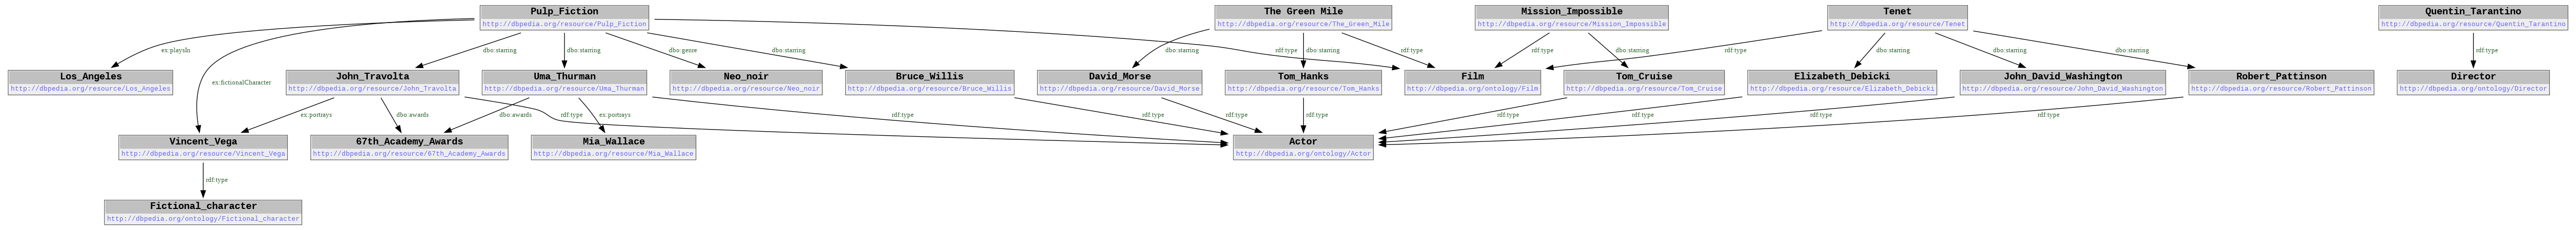

In [23]:
visualize(g)